<a href="https://colab.research.google.com/github/jgr11082003/Stock-Price-Prediction-using-LSTM-Attention/blob/main/Stock_Price_Prediction_using_LSTM_%2B_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow pandas numpy matplotlib yfinance scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
stock = 'AAPL'
df = yf.download(stock, start='2015-01-01', end='2024-01-01')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
print(df.head())


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320440  24.789810  23.879989  24.778686  212818400
2015-01-05  23.635283  24.169162  23.448426  24.089080  257142000
2015-01-06  23.637512  23.897778  23.274918  23.699798  263188400
2015-01-07  23.968960  24.069062  23.735387  23.846612  160423600
2015-01-08  24.889908  24.947745  24.180292  24.298192  237458000


In [5]:
data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
class Attention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    Attention(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 64)             │           124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,133 (74.74 KB)

 Trainable params: 19,133 (74.74 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0785 - val_loss: 0.0130
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0015 - val_loss: 0.0054
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0013 - val_loss: 0.0054
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 9/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 10/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 11/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 12/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0

In [11]:
predicted = model.predict(X_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [12]:
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


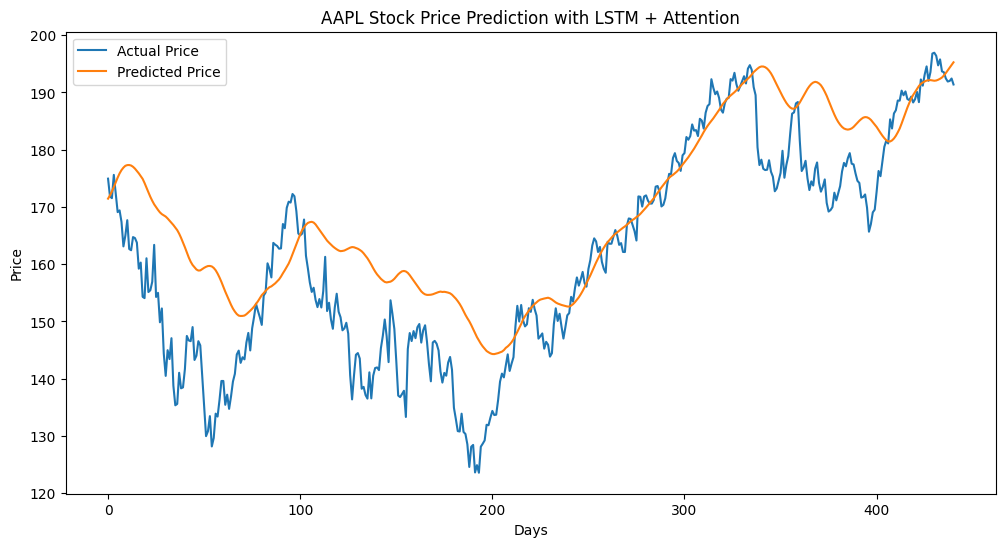

In [13]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title(f'{stock} Stock Price Prediction with LSTM + Attention')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
